# Visualization notebook - all graphs

## Sample Word Cloud - Important words 2018-19

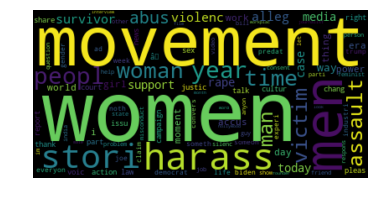

In [1]:
import freq_dict
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
%matplotlib inline
wordcloud = WordCloud().generate_from_frequencies(freq_dict.freq_dict('tweet_2018_to_2019_with_hashtags.csv'))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

I'll make the word clouds more hi-res and presentable, for the ppt

## Time analysis with 2017-19 annotations

### @Zhaowei
Import function that returns tweet_month_df dataframe - first cell of tweet_number_trend
Plot the graph with the annotations, maybe write the annotations and everything into another function? Have as less code on the notebook as possible

## Number of mentions of famous people

### @Zhaowei
Import function that returns dict of person name:mentions mappings - third cell of tweet_number_trend (want me to do this?)
Plot bar graph. (The proper noun word cloud I'm getting is all proper nouns, like America, President etc., so we might still need to show a normal bar graph - but not too necessary)

## Number of reports on people

### @everyone
The CNN and normal reports per person that Zhaowei's taken are arbitrary values of number of reports he found on Google search Will be a hard sell with Prof. I'll try to make something for scraping just the number of mentions in CNN articles for these people

## Geography

### @James
Import functions that return whatever you need for plotting the maps, and plot either USA or World map - our repo needs to be clean is all, we'll show all the maps during the presentation